In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def get_wall_z_image(Z_val, fx, fy, cx, cy, szx, szy):
    Z = Z_val*np.ones((szy, szx), dtype=np.float32)
    return Z

def get_road_z_image(H_val, fx, fy, cx, cy, szx, szy):
    y = np.arange(szy).reshape(-1,1)*1.
    y = np.tile(y, (1, szx))
    Z = np.zeros((szy, szx), dtype=np.float32)
    Z[y > cy] = H_val*fy / (y[y>cy]-cy)
    Z[y <= cy] = np.NaN
    return Z

def plot_optical_flow(ax, Z, u, v, cx, cy, szx, szy, s=16):
    # Here is a function for plotting the optical flow. Feel free to modify this 
    # function to work well with your inputs, for example if your predictions are
    # in a different coordinate frame, etc.
    x, y = np.meshgrid(np.arange(szx), np.arange(szy))
    ax.imshow(Z, alpha=0.5, origin='upper')
    q = ax.quiver(x[::s,::s], y[::s,::s], u[::s,::s], -v[::s, ::s])
    # ax.quiverkey(q, X=0.5, Y=0.9, U=20, 
    # label='Quiver key length = 20', labelpos='N')
    ax.axvline(cx)
    ax.axhline(cy)
    ax.set_xlim([0, szx])
    ax.set_ylim([szy, 0])
    ax.axis('equal')

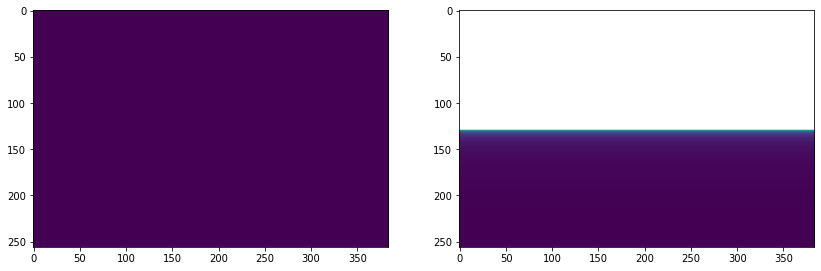

In [4]:
# Focal length along X and Y axis. In class we assumed the smae focal length 
# for X and Y axis. but in general they could be different. We are denoting 
# these by fx and fy.
fx = fy = 128.

# Size of the image
szy = 256
szx = 384

# Center of the image. We are going to assume that the principal point is at 
# the center of the image.
cx = 192
cy = 128

# Gets the image of a wall 2m in front of the camera.
Z1 = get_wall_z_image(2., fx, fy, cx, cy, szx, szy)


# Gets the image of the ground plane that is 3m below the camera.
Z2 = get_road_z_image(3., fx, fy, cx, cy, szx, szy)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,7))
ax1.imshow(Z1)
ax2.imshow(Z2)


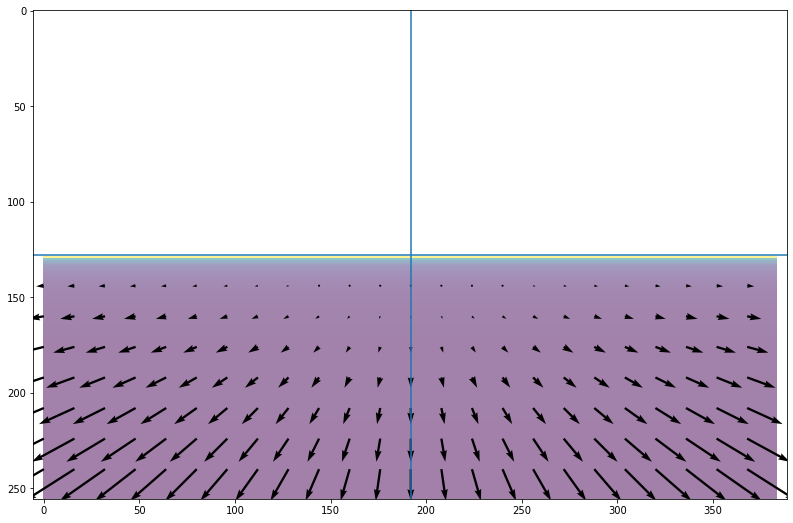

In [5]:
# Looking forward on a horizontal plane while driving on a flat road
f = plt.figure(figsize=(13.5,9))
x = np.zeros((szy,szx))
y = np.zeros((szy,szx))
for i in range(szy):
    for j in range(szx):
        x[i,j] = j - cx
        y[i,j] = i - cy
u = x/Z2
v = y/Z2
plot_optical_flow(f.gca(), Z2, u, v, cx, cy, szx, szy, s=16)

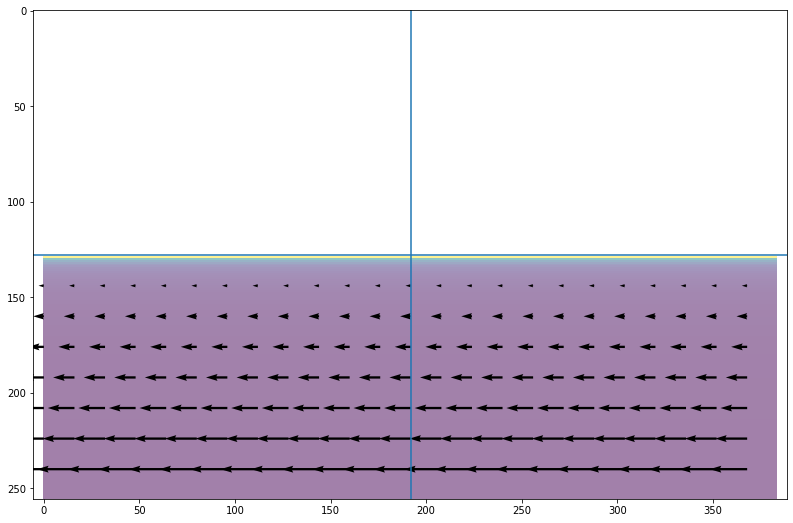

In [6]:
#ii. Sitting in a train and looking out over a flat field from a side window
f = plt.figure(figsize=(13.5,9))
x = np.zeros((szy,szx))
y = np.zeros((szy,szx))
for i in range(szy):
    for j in range(szx):
        x[i,j] = j - cx
        y[i,j] = i - cy
u = -1/Z2
v = np.zeros((szy,szx))
plot_optical_flow(f.gca(), Z2, u, v, cx, cy, szx, szy, s=16)

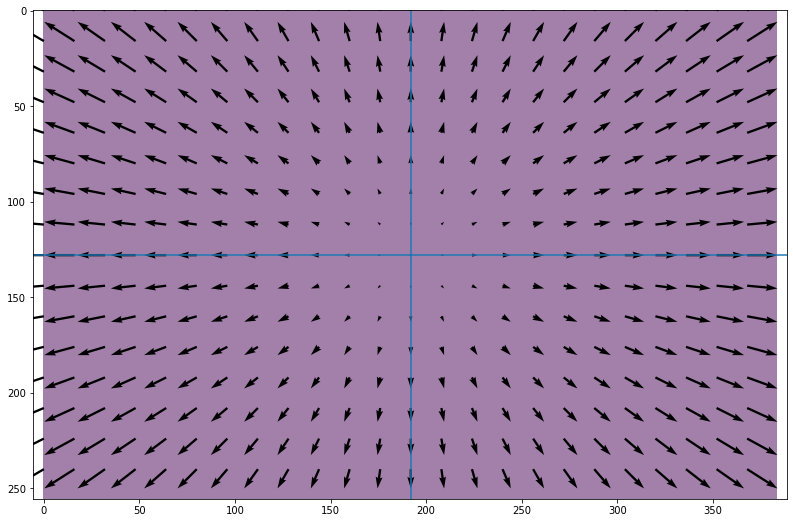

In [7]:
#iii. Flying into a wall head-on.
f = plt.figure(figsize=(13.5,9))
x = np.zeros((szy,szx))
y = np.zeros((szy,szx))
for i in range(szy):
    for j in range(szx):
        x[i,j] = j - cx
        y[i,j] = i - cy
u = x/Z1
v = y/Z1
plot_optical_flow(f.gca(), Z1, u, v, cx, cy, szx, szy, s=16)

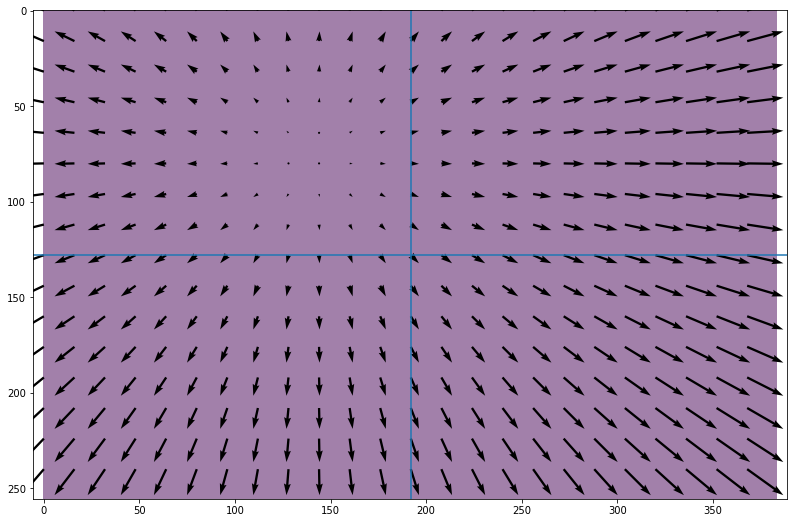

In [11]:
#iv. Flying into a wall but also translating horizontally, and vertically???????
f = plt.figure(figsize=(13.5,9))
x = np.zeros((szy,szx))
y = np.zeros((szy,szx))
for i in range(szy):
    for j in range(szx):
        x[i,j] = j - cx
        y[i,j] = i - cy
u = (1+x)/Z1 + 50/Z1
v = (1+y)/Z1 + 50/Z1
plot_optical_flow(f.gca(), Z1, u, v, cx, cy, szx, szy, s=16)

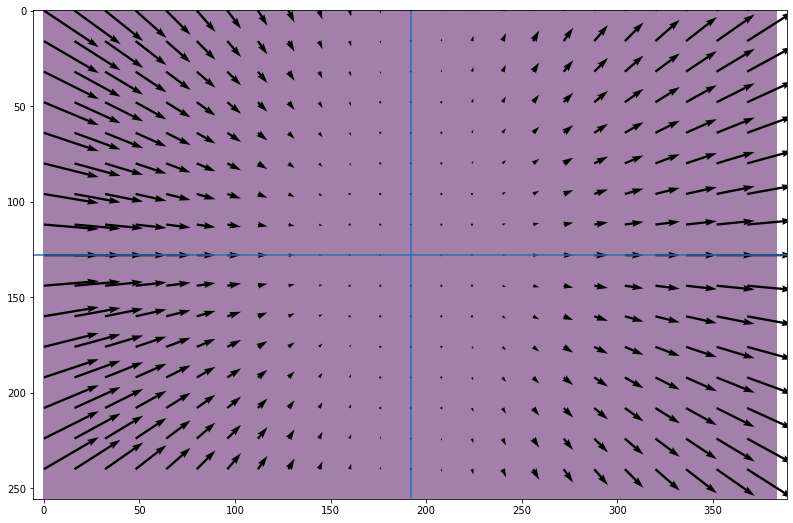

In [9]:
#iv. Flying into a wall but also translating horizontally, and vertically
f = plt.figure(figsize=(13.5,9))
x = np.zeros((szy,szx))
y = np.zeros((szy,szx))
for i in range(szy):
    for j in range(szx):
        x[i,j] = j - cx
        y[i,j] = i - cy
u = (1+np.multiply(x,x))/Z1
v = (np.multiply(x,y))/Z1
plot_optical_flow(f.gca(), Z1, u, v, cx, cy, szx, szy, s=16)